
# Perceptrón Simple


## Clase

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron() :

    def __init__(self, input_size, learning_rate = 0.01) :
        self.w = np.random.randn(input_size, 1)
        self.b = np.random.randn(1)
        self.learning_rate = learning_rate

        self.error_history = []
        self.accuracy_history = []
        self.training_data = None

    def evaluar_cota(self, x, y, w, steps) :

        R = np.max(np.linalg.norm(x, axis = 1)) # R

        margins = y * (x @ w).flatten()
        rho = np.min(np.abs(margins)) # p^2 (1)

        nsq_w = np.linalg.norm(w) ** 2 # ||w*||^2

        bound = (R ** 2) / (rho ** 2) * nsq_w

        print("\n" + "="*50)
        print("EVALUACIÓN DE LA COTA TEÓRICA")
        print("="*50)
        print(f"R (máx norma de x): {R:.4f}")
        print(f"ρ (margen mínimo): {rho:.4f}")
        print(f"||w*||^2: {nsq_w:.4f}")
        print(f"Cota teórica: {bound:.2f}")
        print(f"¿Se cumple? {'Sí' if steps <= bound else 'No'}")
    
    def linear_sep_data(n = 100, p = 2):
        x = np.random.uniform(-1, 1, (n, p)) # Datos aleatorios en [-1, 1]
        w = np.ones((p, 1)) # Vector de pesos (1, 1, ..., 1)
        y = np.where((x @ w) >= 0, 1, -1) # Etiquetas según el hiperplano
        return x, y.flatten(), w

    def predict(self, x) :
        z = np.dot(x, self.w) + self.b # Cálculo de la salida linea.
        return np.where(z >= 0, 1, -1) # Función escalón.

    def train(self, x , y, epochs = 100, resultados = False) :

        self.training_data = (x, y)
        convergence_epoch = epochs

        # Información inicial del entrenamiento.
        if resultados:
            print("\n" + "="*50)
            print("INICIO DEL ENTRENAMIENTO")
            print("="*50)
            print(f"Muestras: {len(x)}, Características: {x.shape[1]}")
            print(f"Tasa de aprendizaje: {self.learning_rate}")
            print(f"Pesos iniciales: {self.w.flatten().round(4)}")
            print(f"Bias inicial: {self.b[0]:.4f}")
            print("-" * 50)
        
        for epoch in range(epochs) : # Por cada epoca...
            
            # Contadores de errores y aciertos.
            errors = 0
            correct = 0

            # Por cada muestra/registro...
            for i in range(len(x)) :
                y_pred = self.predict(x[i]) # Se predice la clase.
                error = y[i] - y_pred # En base a la predicción se determina el error / residuo.

                if error != 0 : # Si es diferente de cero
                    self.w += self.learning_rate * error * x[i].reshape(-1, 1) # Ajusto el vector de pesos y...
                    self.b += self.learning_rate * error # el valor de bias.
                    errors += 1 # Sumo el error al contador.
                else : # Sino...
                    correct += 1 # Sumo el acierto al contador.

            accuracy = correct / len(x) # Calculo la precisión.
            self.error_history.append(errors) # Registro el número de errores.
            self.accuracy_history.append(accuracy) # Registro la precisión.

            # Mostrar información cada 20 épocas, la última y si hay convergencia.
            if resultados and (epoch % 20 == 0 or epoch == epochs-1 or errors == 0) :
                print(f"Época {epoch:3d}: Errores = {errors:3d}, Precisión = {accuracy:.1%}")

            # Criterio de convergencia: si no hay errores.
            if errors == 0 :
                convergence_epoch = epoch + 1
                if resultados :
                    print(f"¡Convergencia alcanzada en época {convergence_epoch}!")
                    break

        # Mostrar resultados finales.
        if resultados :
            self.print_results(x, y, convergence_epoch)

        return convergence_epoch

    ### Funciones de visualización y reporte de resultados ###
    def print_results(self, x, y, convergence_epoch):
        n = len(x)

        final_errors = self.error_history[-1] if self.error_history else n
        final_accuracy = (n - final_errors) / n

        # # Mostrar formas de los arrays para ajustar errores.
        # print(f"FORMA de x: {x.shape}")
        # print(f"FORMA de y: {y.shape}")
        # print(f"FORMA de self.w: {self.w.shape}")
        # print(f"FORMA de self.b: {self.b.shape}")

        print("\n" + "="*50)
        print("RESULTADOS DEL ENTRENAMIENTO")
        print("="*50)
        print(f"Épocas entrenadas: {convergence_epoch}")
        print(f"Precisión final: {final_accuracy:.1%}")
        print(f"Pesos finales: {self.w.flatten().round(4)}")
        print(f"Bias final: {self.b[0]:.4f}")
        
        # Matriz de confusión simplificada
        # y_pred = np.array([self.predict(x_i) for x_i in x]).flatten()
        y_pred = self.predict(x).flatten()
        print(f"Predicciones: {y_pred.shape}, Verdaderos: {y.shape}")
        correct = np.sum(y_pred == y)
        incorrect = n - correct
        
        print(f"\nMatriz de confusión simplificada:")
        print(f"Correctas: {correct}/{n}")
        print(f"Incorrectas: {incorrect}/{n}")

    def plot_training_history(self):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Gráfico de errores
        ax1.plot(self.error_history, 'r-', alpha=0.7)
        ax1.set_title('Evolución de Errores por Época')
        ax1.set_xlabel('Época')
        ax1.set_ylabel('Número de Errores')
        ax1.grid(True, alpha=0.3)
        
        # Gráfico de precisión
        ax2.plot(self.accuracy_history, 'g-', linewidth=2, label='Precisión')
        ax2.set_title('Precisión durante Entrenamiento')
        ax2.set_xlabel('Época')
        ax2.set_ylabel('Precisión')
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Si es un problema 2D, mostrar la frontera de decisión
        if self.w.shape[0] == 2 and self.training_data is not None:
            self.plot_decision_boundary()

    def plot_decision_boundary(self):

        if self.training_data is None:
            print("No hay datos de entrenamiento para visualizar.")
            return
            
        x_train, y_train = self.training_data

        plt.figure(figsize=(8, 6))
        
        # Crear una malla para visualizar la frontera de decisión
        x_min, x_max = -1.5, 1.5
        y_min, y_max = -1.5, 1.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        
        # Predecir para cada punto de la malla
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Graficar contorno
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.colorbar()
        
        # Graficar puntos de datos
        plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, 
                   edgecolors='k', marker='o')
        
        plt.title('Frontera de Decisión del Perceptrón')
        plt.xlabel('Característica 1')
        plt.ylabel('Característica 2')
        plt.grid(True, alpha=0.3)
        plt.show()


## Prueba


### Escenarios Sintéticos



#### Sin semilla.


#################### Experimento con n=10, p=2####################

INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [-0.7132  0.4461]
Bias inicial: -0.2801
--------------------------------------------------
Época   0: Errores =   2, Precisión = 80.0%
Época   3: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 4!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 4
Precisión final: 100.0%
Pesos finales: [-0.1368  0.4838]
Bias final: 0.2199
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


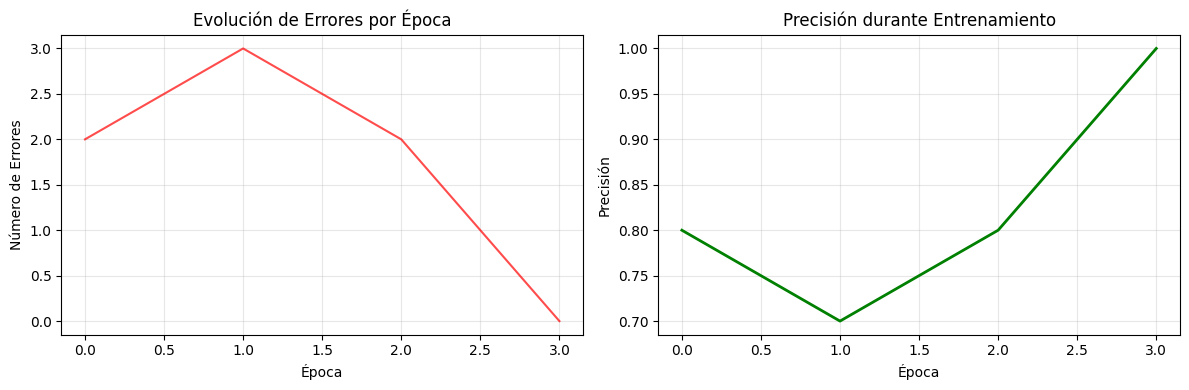

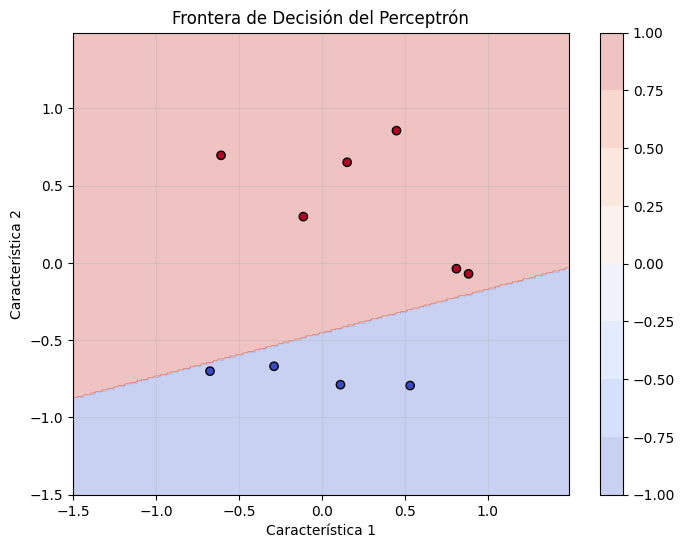


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 0.9716
ρ (margen mínimo): 0.0896
||w*||^2: 2.0000
Cota teórica: 235.27
¿Se cumple? Sí

#################### Experimento con n=50, p=5####################

INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [-0.6172  1.031  -0.1977 -0.4965  0.7376]
Bias inicial: -0.9197
--------------------------------------------------
Época   0: Errores =  16, Precisión = 68.0%
Época   4: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 5!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 5
Precisión final: 100.0%
Pesos finales: [0.3427 0.589  0.52   0.2559 0.6902]
Bias final: 0.0803
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


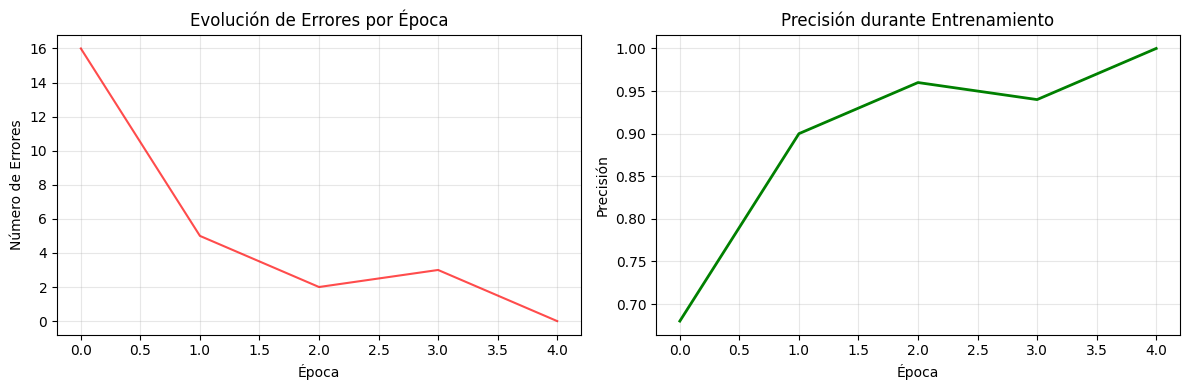


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.6620
ρ (margen mínimo): 0.0083
||w*||^2: 5.0000
Cota teórica: 198221.62
¿Se cumple? Sí

#################### Experimento con n=100, p=10####################

INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [-0.5853 -1.3324  0.1989  1.2484 -0.3599  0.0438  0.1401  0.1697  1.5297
  0.413 ]
Bias inicial: 2.3527
--------------------------------------------------
Época   0: Errores =  36, Precisión = 64.0%
Época   5: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 6!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 6
Precisión final: 100.0%
Pesos finales: [0.732  0.6173 0.639  0.7066 0.6566 0.5469 0.7321 0.5613 0.5648 0.5653]
Bias final: 0.0527
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


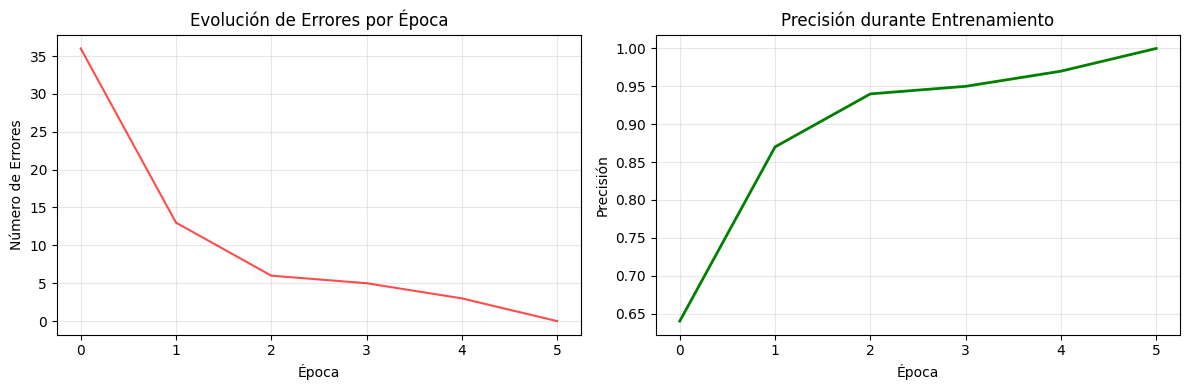


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 2.3877
ρ (margen mínimo): 0.0252
||w*||^2: 10.0000
Cota teórica: 89515.81
¿Se cumple? Sí

#################### Experimento con n=1000, p=20####################

INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 0.5071  0.1287  0.1393  0.8073  0.4134  0.676  -2.0199 -0.1568 -0.279
  0.4041  0.1613 -1.1575  1.1318 -0.6523  0.2162  0.1594 -0.4147  0.2986
  0.5763 -0.2489]
Bias inicial: -1.3401
--------------------------------------------------
Época   0: Errores = 109, Precisión = 89.1%
Época  20: Errores =  31, Precisión = 96.9%
Época  40: Errores =  37, Precisión = 96.3%
Época  60: Errores =  28, Precisión = 97.2%
Época  80: Errores =  24, Precisión = 97.6%
Época 100: Errores =  22, Precisión = 97.8%
Época 120: Errores =  26, Precisión = 97.4%
Época 140: Errores =  23, Precisión = 97.7%
Época 160: Errores =  16, Precisión = 98.4%
Época 180: Errores =  16, Precisión = 98.4%
Época 20

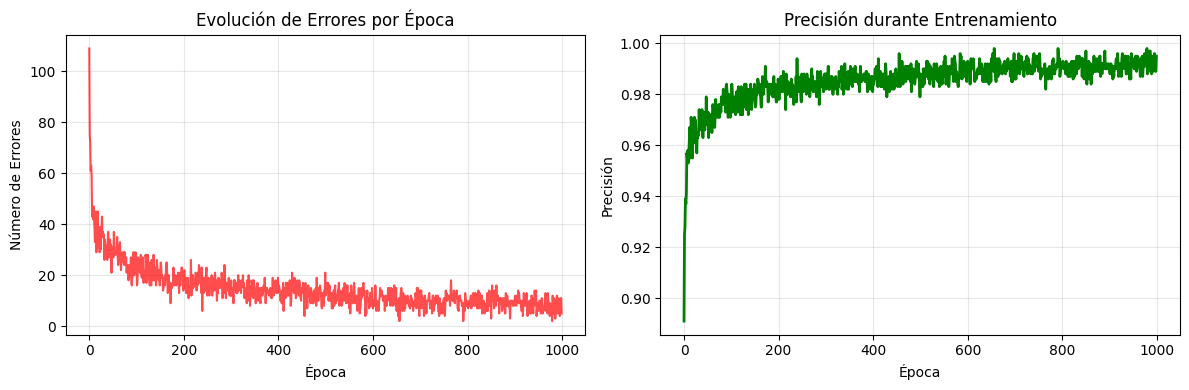


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 3.3912
ρ (margen mínimo): 0.0039
||w*||^2: 20.0000
Cota teórica: 14869274.79
¿Se cumple? Sí


In [2]:
n = [10, 50, 100, 1000]
p = [2, 5, 10, 20]
epochs = 1000

for ni, pi in zip(n, p):
    print(f"\n{'#'*20} Experimento con n={ni}, p={pi}{'#'*20}")
    x, y, w = Perceptron.linear_sep_data(ni, pi)
    
    perceptron = Perceptron(input_size = pi, learning_rate = 0.05)
    steps = perceptron.train(x, y, epochs = epochs, resultados = True)

    perceptron.plot_training_history()
    perceptron.evaluar_cota(x, y, w, steps)


#### Con semilla.



#################### Experimento con n=10, p=2, seed=1 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 1.1338 -1.0999]
Bias inicial: -0.1724
--------------------------------------------------
Época   0: Errores =   3, Precisión = 70.0%
Época  15: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 16!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 16
Precisión final: 100.0%
Pesos finales: [0.6601 0.5252]
Bias final: 0.0276
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


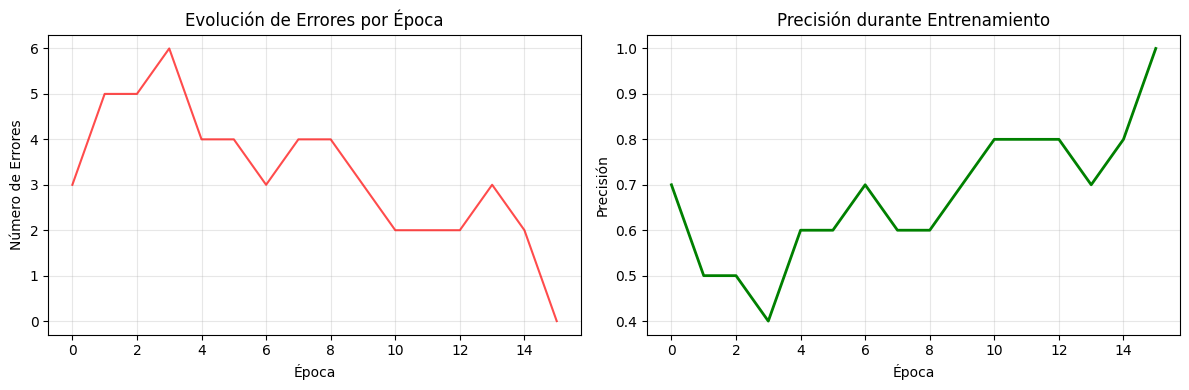

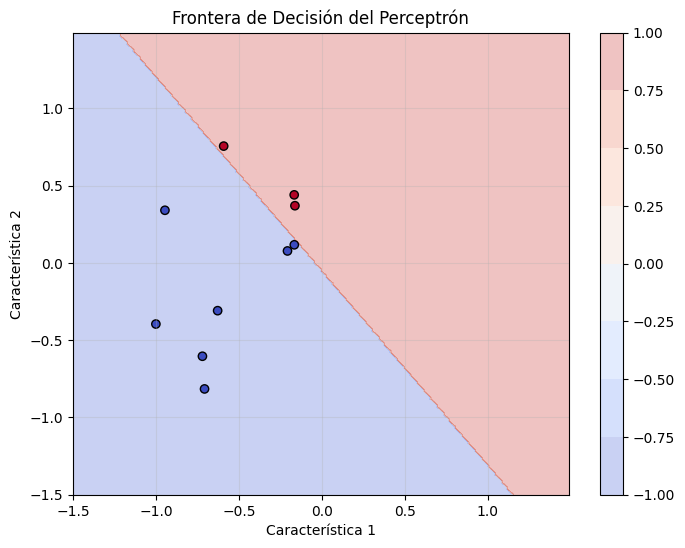


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.0788
ρ (margen mínimo): 0.0480
||w*||^2: 2.0000
Cota teórica: 1009.86
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=1 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [-0.8779 -1.2369  0.8758  0.6234 -0.435 ]
Bias inicial: 1.4075
--------------------------------------------------
Época   0: Errores =  19, Precisión = 62.0%
Época   5: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 6!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 6
Precisión final: 100.0%
Pesos finales: [0.3246 0.5191 0.4638 0.7832 0.5889]
Bias final: 0.0075
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


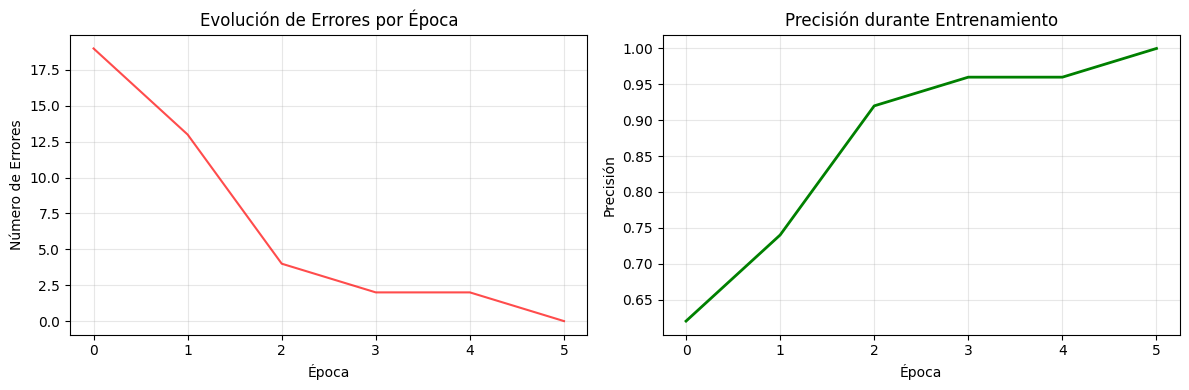


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.8109
ρ (margen mínimo): 0.0589
||w*||^2: 5.0000
Cota teórica: 4730.21
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=1 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 0.1291  0.3877 -0.3548  1.1771 -0.6411  1.3227  0.1942  2.5655 -0.4641
 -0.2027]
Bias inicial: 0.1457
--------------------------------------------------
Época   0: Errores =  31, Precisión = 69.0%
Época   7: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 8!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 8
Precisión final: 100.0%
Pesos finales: [0.4472 0.2676 0.9695 0.9671 0.8566 0.918  0.9788 0.8613 0.7718 0.4808]
Bias final: -0.0543
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


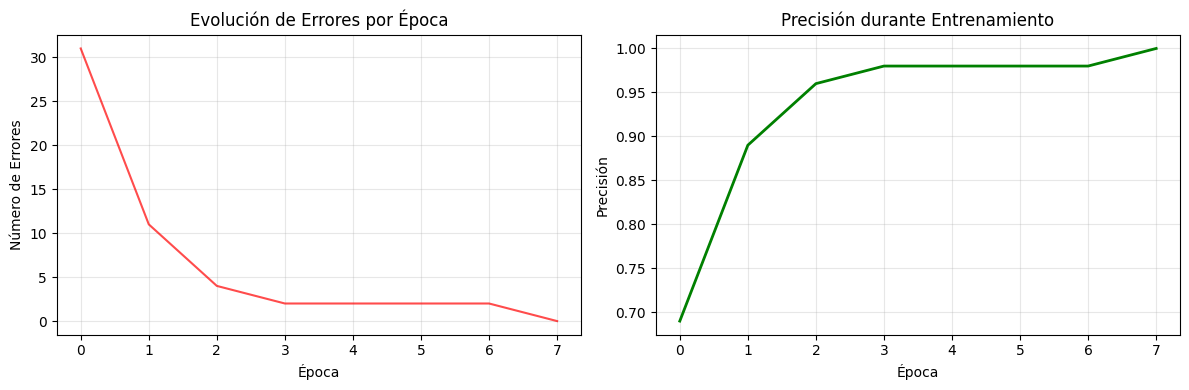


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 2.4366
ρ (margen mínimo): 0.0232
||w*||^2: 10.0000
Cota teórica: 110096.05
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=1 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 0.0851  2.577  -2.3008 -0.4365 -0.1699  1.1181 -0.7535 -0.94   -0.252
  0.3055  0.452   0.1203 -2.1761  0.9448  0.4485  0.2418  0.2029  0.0947
  1.1048 -1.6036]
Bias inicial: 0.8099
--------------------------------------------------
Época   0: Errores = 141, Precisión = 85.9%
Época  20: Errores =  31, Precisión = 96.9%
Época  40: Errores =  29, Precisión = 97.1%
Época  60: Errores =  24, Precisión = 97.6%
Época  80: Errores =  16, Precisión = 98.4%
Época 100: Errores =  13, Precisión = 98.7%
Época 120: Errores =  14, Precisión = 98.6%
Época 140: Errores =   9, Precisión = 99.1%
Época 160: Errores =   9, Precisión = 99.1%
Época 180: Errores =  10, Precisión = 99.

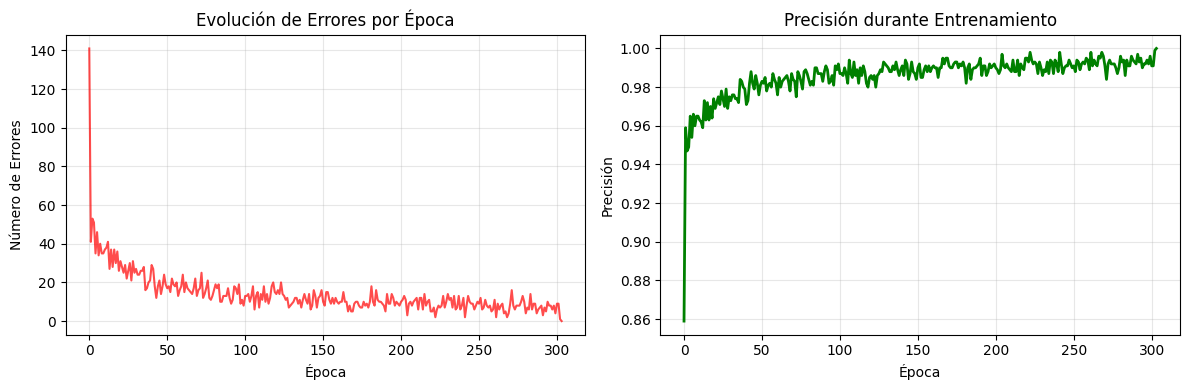


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 3.3222
ρ (margen mínimo): 0.0014
||w*||^2: 20.0000
Cota teórica: 110980249.43
¿Se cumple? Sí


#################### Experimento con n=10, p=2, seed=42 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [-1.0128  0.3142]
Bias inicial: -0.9080
--------------------------------------------------
Época   0: Errores =   6, Precisión = 40.0%
Época   5: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 6!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 6
Precisión final: 100.0%
Pesos finales: [0.1312 0.1113]
Bias final: -0.0080
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


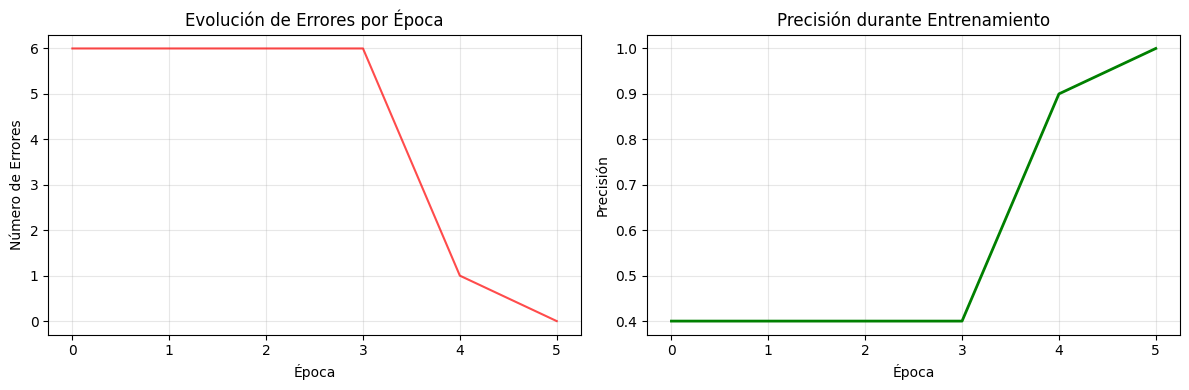

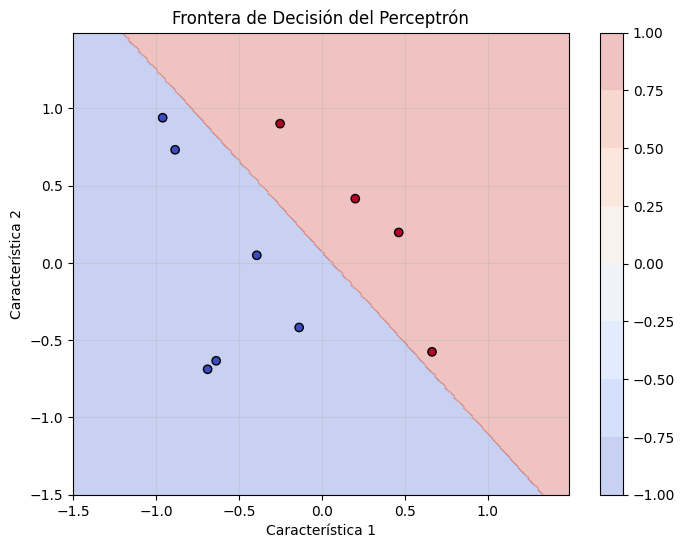


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.3426
ρ (margen mínimo): 0.0190
||w*||^2: 2.0000
Cota teórica: 9974.93
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=42 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [-1.4123  0.515   3.8527  0.5709  1.1356]
Bias inicial: 0.9540
--------------------------------------------------
Época   0: Errores =  19, Precisión = 62.0%
Época   8: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 9!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 9
Precisión final: 100.0%
Pesos finales: [1.6897 1.1731 1.6895 1.2369 1.6934]
Bias final: 0.2540
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


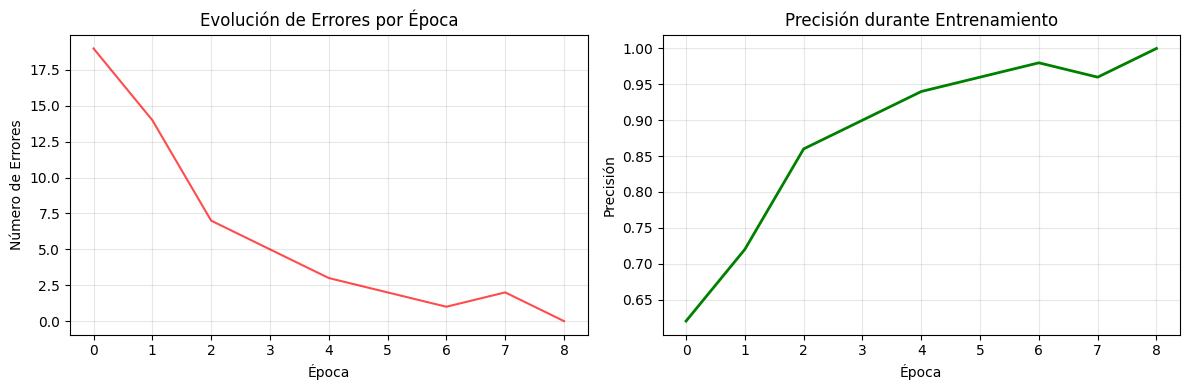


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.8505
ρ (margen mínimo): 0.0731
||w*||^2: 5.0000
Cota teórica: 3206.77
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=42 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 0.6514  1.5034  0.8774 -0.221   0.0269  0.2084 -2.0417 -0.2472 -0.682
 -1.0016]
Bias inicial: -0.2811
--------------------------------------------------
Época   0: Errores =  37, Precisión = 63.0%
Época   5: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 6!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 6
Precisión final: 100.0%
Pesos finales: [0.6271 0.4864 0.629  0.4772 0.5254 0.4304 0.4783 0.5956 0.7056 0.5008]
Bias final: -0.1811
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


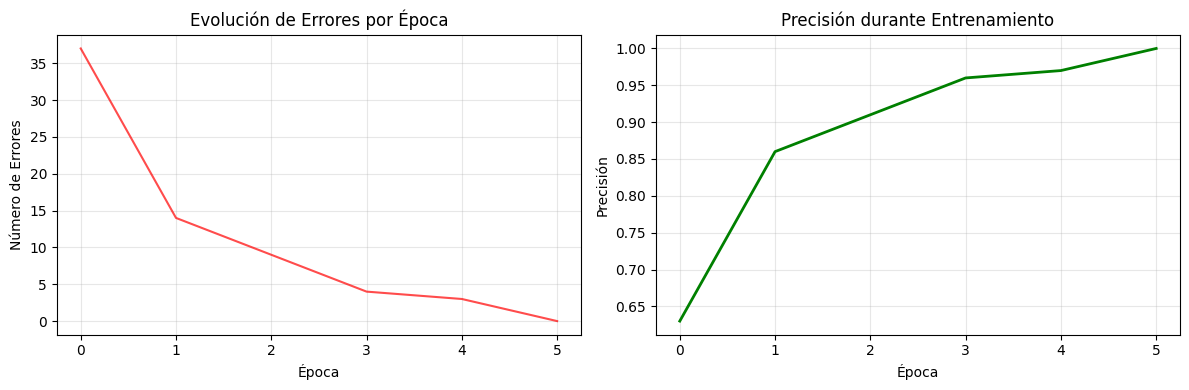


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 2.4245
ρ (margen mínimo): 0.0393
||w*||^2: 10.0000
Cota teórica: 38016.05
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=42 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [-1.0308 -0.5649 -0.618   0.8453 -0.886  -1.7558 -1.9671 -1.4704  1.3615
  0.0162  0.5012  0.5365  0.0562 -0.0748  1.0445  0.146   1.3991  0.6208
 -0.6178 -0.4971]
Bias inicial: -0.7275
--------------------------------------------------
Época   0: Errores = 154, Precisión = 84.6%
Época  20: Errores =  19, Precisión = 98.1%
Época  40: Errores =  30, Precisión = 97.0%
Época  60: Errores =  24, Precisión = 97.6%
Época  80: Errores =  18, Precisión = 98.2%
Época 100: Errores =  22, Precisión = 97.8%
Época 120: Errores =   9, Precisión = 99.1%
Época 140: Errores =  10, Precisión = 99.0%
Época 160: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 161!


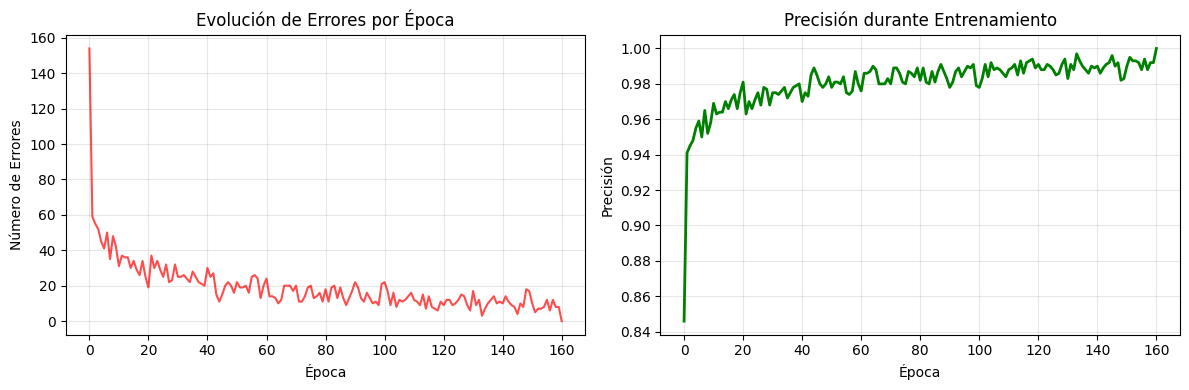


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 3.3396
ρ (margen mínimo): 0.0019
||w*||^2: 20.0000
Cota teórica: 60939119.69
¿Se cumple? Sí


#################### Experimento con n=10, p=2, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 0.6727 -0.1044]
Bias inicial: -0.5313
--------------------------------------------------
Época   0: Errores =   5, Precisión = 50.0%
Época   3: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 4!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 4
Precisión final: 100.0%
Pesos finales: [0.4471 0.4719]
Bias final: -0.0313
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


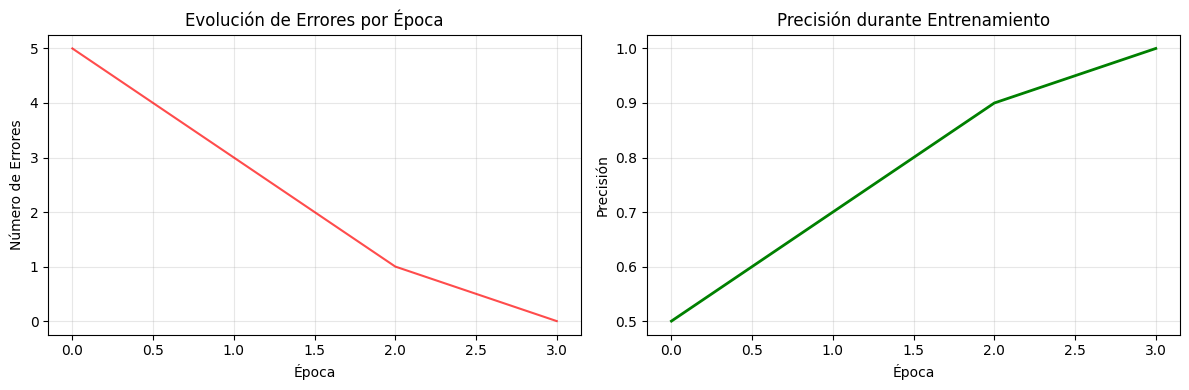

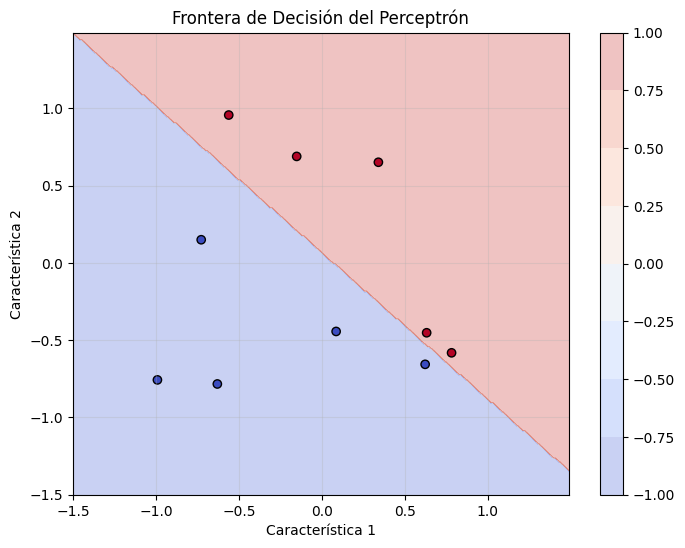


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.2466
ρ (margen mínimo): 0.0328
||w*||^2: 2.0000
Cota teórica: 2897.54
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 1.0297  0.4771 -1.4298  0.4077 -0.8283]
Bias inicial: 0.4235
--------------------------------------------------
Época   0: Errores =  21, Precisión = 58.0%
Época   8: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 9!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 9
Precisión final: 100.0%
Pesos finales: [0.3689 0.5396 0.4637 0.6392 0.5293]
Bias final: 0.0235
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


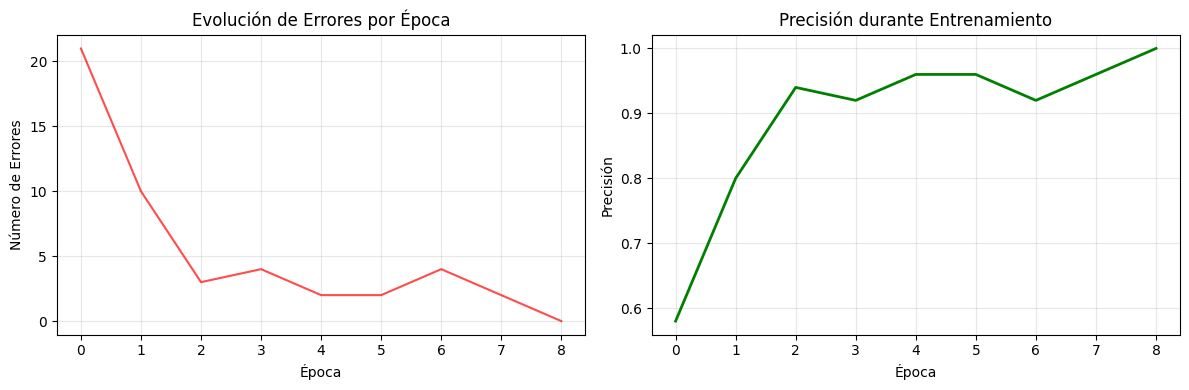


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.9440
ρ (margen mínimo): 0.0704
||w*||^2: 5.0000
Cota teórica: 3808.89
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [-0.1595  0.682  -0.738   1.3263  0.927   0.2131  1.3283 -0.2109 -0.6769
  0.1351]
Bias inicial: -0.1643
--------------------------------------------------
Época   0: Errores =  25, Precisión = 75.0%
Época  20: Errores =   3, Precisión = 97.0%
Época  22: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 23!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 23
Precisión final: 100.0%
Pesos finales: [0.5622 0.8312 0.7151 0.7464 0.777  0.8923 0.7701 0.723  0.6806 0.5832]
Bias final: 0.0357
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


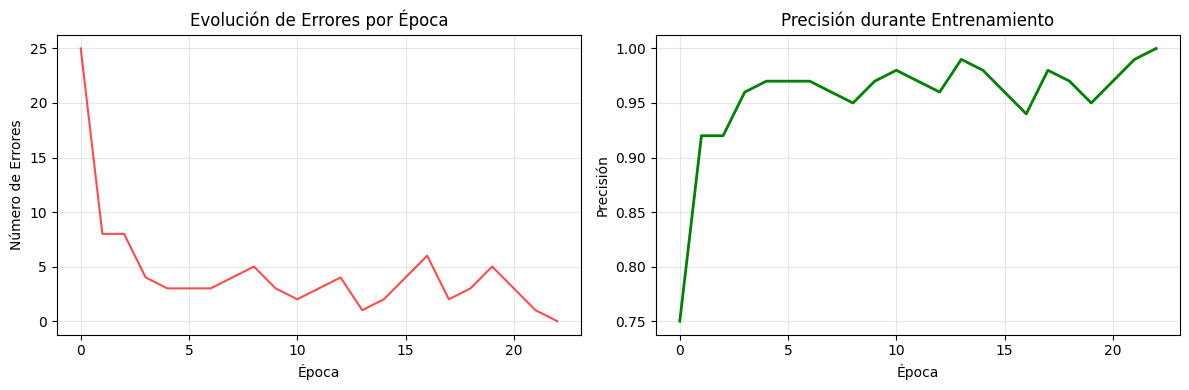


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 2.5096
ρ (margen mínimo): 0.0052
||w*||^2: 10.0000
Cota teórica: 2337723.62
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 1.3662 -1.7515  0.2997  0.9907 -0.1643  2.1769  1.2591  1.1798  0.5467
  0.4812 -0.3948 -0.9816  1.4554  1.1556  2.0489  0.1134 -0.9862  0.189
  0.4498 -0.0025]
Bias inicial: 0.0766
--------------------------------------------------
Época   0: Errores = 108, Precisión = 89.2%
Época  20: Errores =  22, Precisión = 97.8%
Época  40: Errores =  22, Precisión = 97.8%
Época  60: Errores =  14, Precisión = 98.6%
Época  80: Errores =  18, Precisión = 98.2%
Época 100: Errores =  14, Precisión = 98.6%
Época 120: Errores =  17, Precisión = 98.3%
Época 140: Errores =  14, Precisión = 98.6%
Época 160: Errores =  10, Precisión = 99.0%
Época 180: Errores =  12, Precisión = 

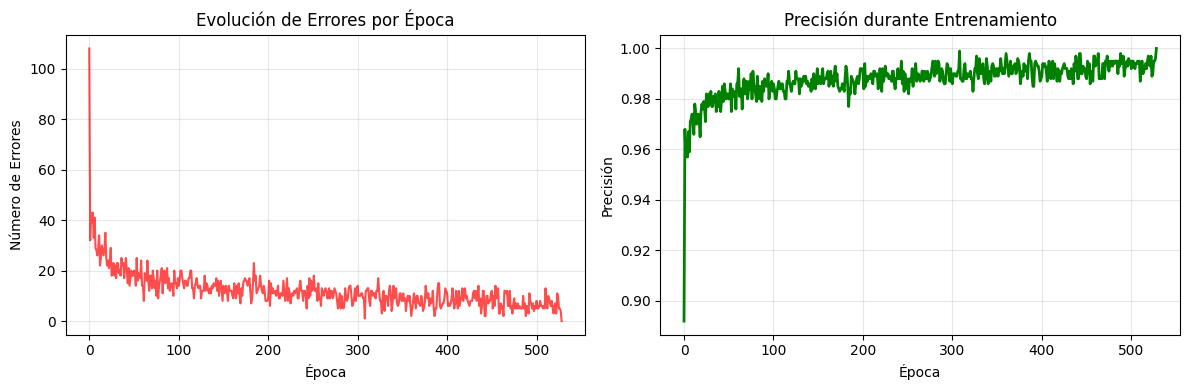


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 3.3097
ρ (margen mínimo): 0.0099
||w*||^2: 20.0000
Cota teórica: 2225102.44
¿Se cumple? Sí


#################### Experimento con n=10, p=2, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 0.6727 -0.1044]
Bias inicial: -0.5313
--------------------------------------------------
Época   0: Errores =   5, Precisión = 50.0%
Época   3: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 4!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 4
Precisión final: 100.0%
Pesos finales: [0.4471 0.4719]
Bias final: -0.0313
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


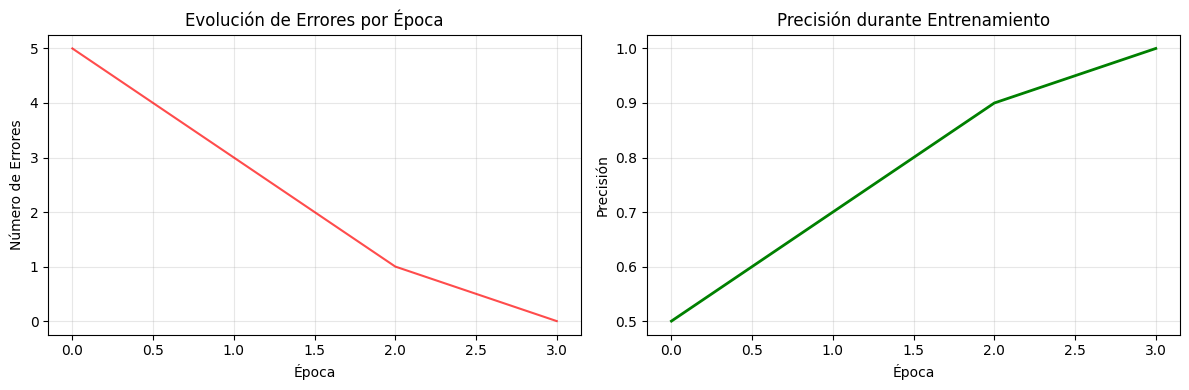

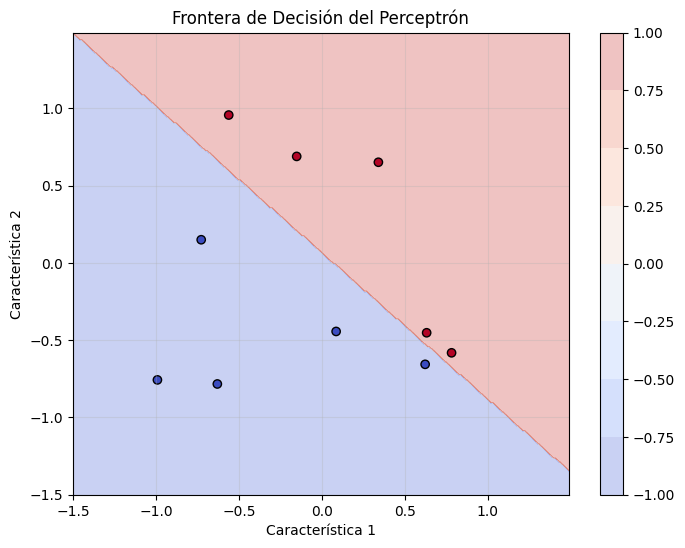


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.2466
ρ (margen mínimo): 0.0328
||w*||^2: 2.0000
Cota teórica: 2897.54
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 1.0297  0.4771 -1.4298  0.4077 -0.8283]
Bias inicial: 0.4235
--------------------------------------------------
Época   0: Errores =  21, Precisión = 58.0%
Época   8: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 9!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 9
Precisión final: 100.0%
Pesos finales: [0.3689 0.5396 0.4637 0.6392 0.5293]
Bias final: 0.0235
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


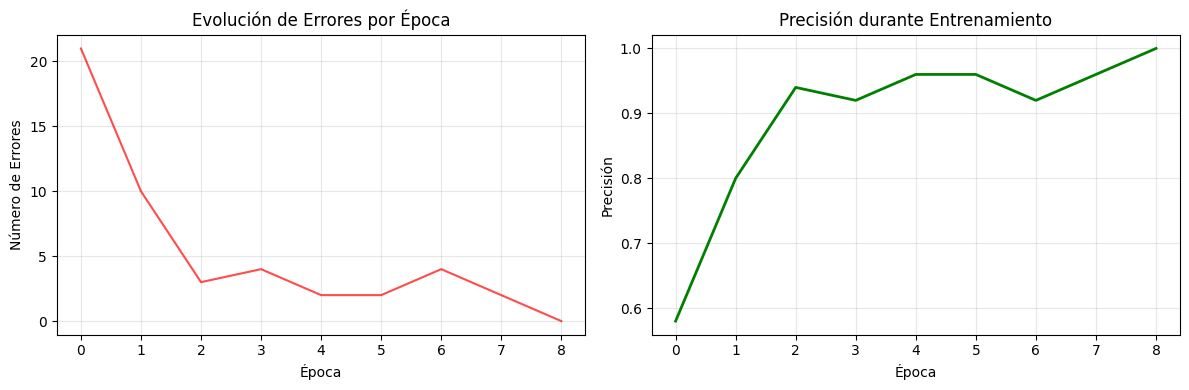


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.9440
ρ (margen mínimo): 0.0704
||w*||^2: 5.0000
Cota teórica: 3808.89
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [-0.1595  0.682  -0.738   1.3263  0.927   0.2131  1.3283 -0.2109 -0.6769
  0.1351]
Bias inicial: -0.1643
--------------------------------------------------
Época   0: Errores =  25, Precisión = 75.0%
Época  20: Errores =   3, Precisión = 97.0%
Época  22: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 23!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 23
Precisión final: 100.0%
Pesos finales: [0.5622 0.8312 0.7151 0.7464 0.777  0.8923 0.7701 0.723  0.6806 0.5832]
Bias final: 0.0357
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


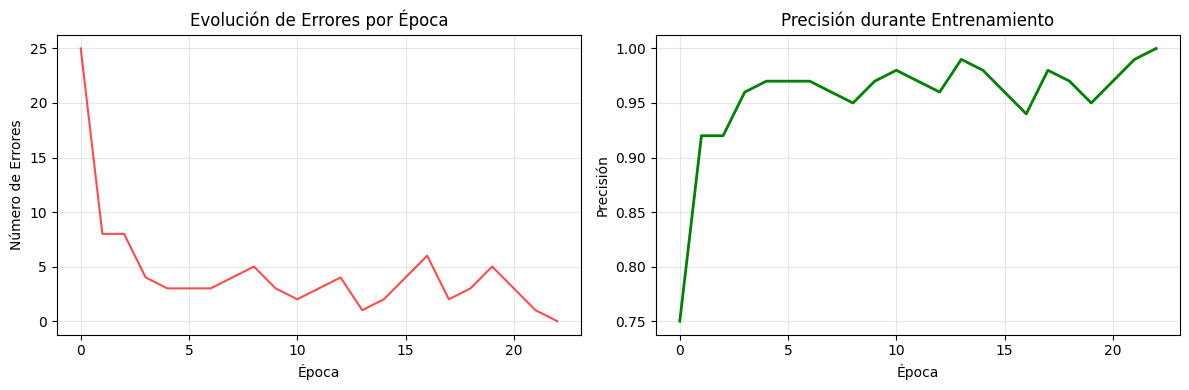


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 2.5096
ρ (margen mínimo): 0.0052
||w*||^2: 10.0000
Cota teórica: 2337723.62
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=100 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 1.3662 -1.7515  0.2997  0.9907 -0.1643  2.1769  1.2591  1.1798  0.5467
  0.4812 -0.3948 -0.9816  1.4554  1.1556  2.0489  0.1134 -0.9862  0.189
  0.4498 -0.0025]
Bias inicial: 0.0766
--------------------------------------------------
Época   0: Errores = 108, Precisión = 89.2%
Época  20: Errores =  22, Precisión = 97.8%
Época  40: Errores =  22, Precisión = 97.8%
Época  60: Errores =  14, Precisión = 98.6%
Época  80: Errores =  18, Precisión = 98.2%
Época 100: Errores =  14, Precisión = 98.6%
Época 120: Errores =  17, Precisión = 98.3%
Época 140: Errores =  14, Precisión = 98.6%
Época 160: Errores =  10, Precisión = 99.0%
Época 180: Errores =  12, Precisión = 

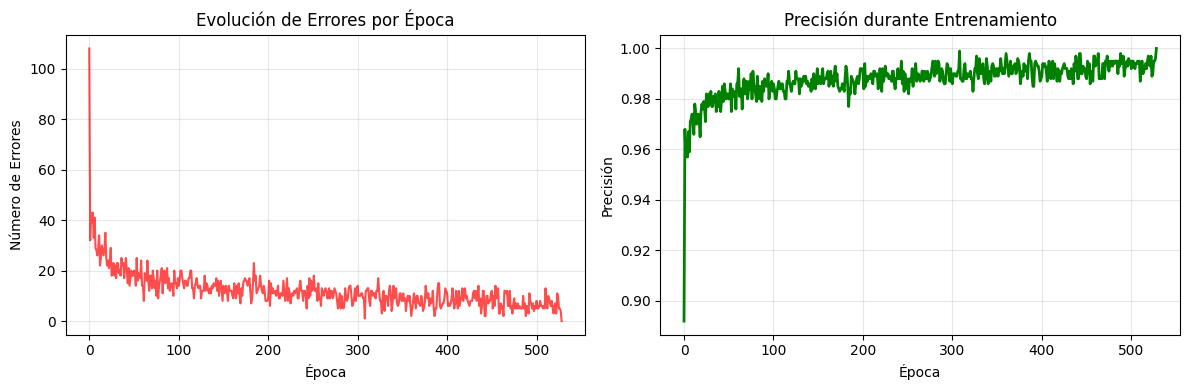


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 3.3097
ρ (margen mínimo): 0.0099
||w*||^2: 20.0000
Cota teórica: 2225102.44
¿Se cumple? Sí


#################### Experimento con n=10, p=2, seed=2024 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 10, Características: 2
Tasa de aprendizaje: 0.05
Pesos iniciales: [-0.417  -0.2495]
Bias inicial: 0.9437
--------------------------------------------------
Época   0: Errores =   5, Precisión = 50.0%
Época   4: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 5!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 5
Precisión final: 100.0%
Pesos finales: [0.0869 0.1517]
Bias final: -0.0563
Predicciones: (10,), Verdaderos: (10,)

Matriz de confusión simplificada:
Correctas: 10/10
Incorrectas: 0/10


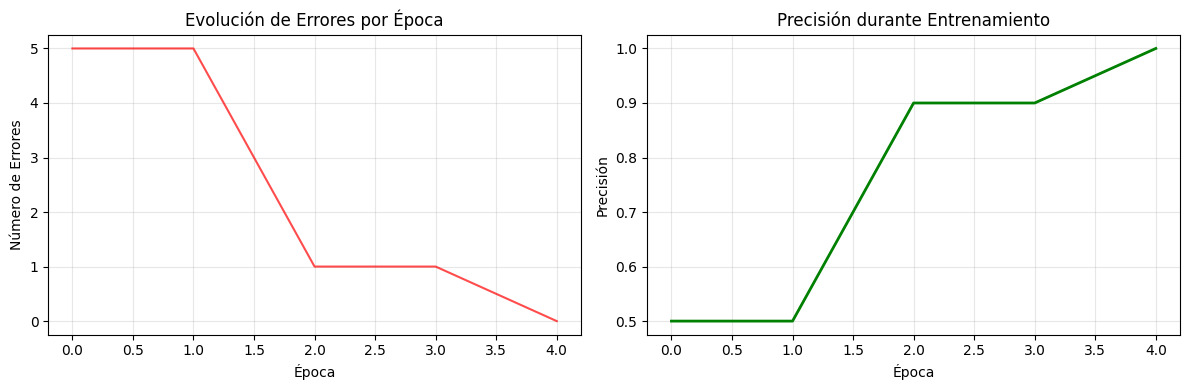

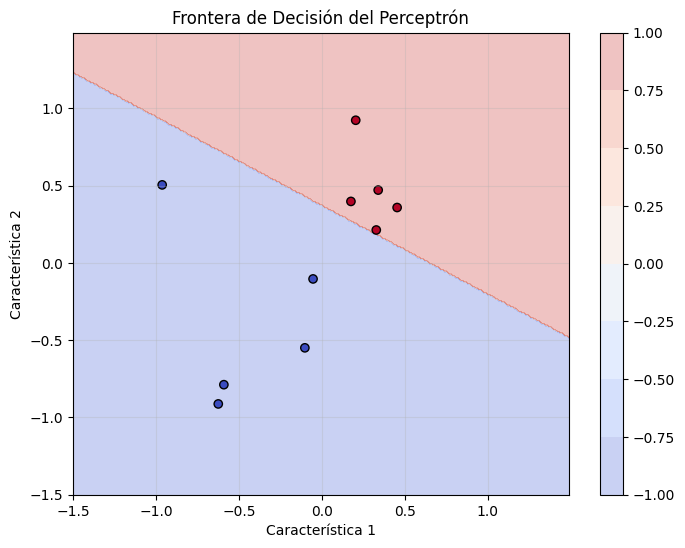


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.1052
ρ (margen mínimo): 0.1557
||w*||^2: 2.0000
Cota teórica: 100.75
¿Se cumple? Sí


#################### Experimento con n=50, p=5, seed=2024 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 50, Características: 5
Tasa de aprendizaje: 0.05
Pesos iniciales: [-0.7663  0.3606 -0.6656 -0.6257 -1.3472]
Bias inicial: -0.5674
--------------------------------------------------
Época   0: Errores =  36, Precisión = 28.0%
Época  10: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 11!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 11
Precisión final: 100.0%
Pesos finales: [0.4419 0.3497 0.3943 0.4014 0.313 ]
Bias final: -0.0674
Predicciones: (50,), Verdaderos: (50,)

Matriz de confusión simplificada:
Correctas: 50/50
Incorrectas: 0/50


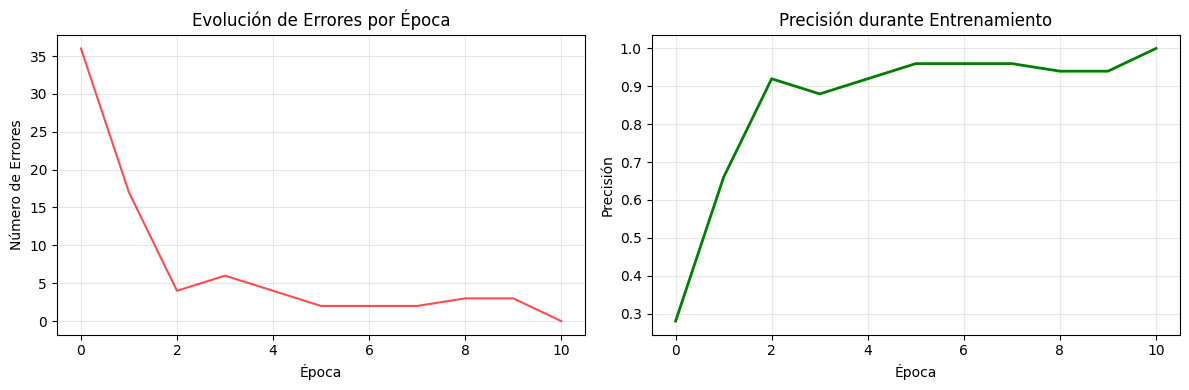


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 1.8472
ρ (margen mínimo): 0.0431
||w*||^2: 5.0000
Cota teórica: 9172.70
¿Se cumple? Sí


#################### Experimento con n=100, p=10, seed=2024 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 100, Características: 10
Tasa de aprendizaje: 0.05
Pesos iniciales: [-0.7702 -1.2088 -1.6298 -2.1247 -1.6735  0.2669  0.173  -0.1401 -0.0339
 -0.2611]
Bias inicial: -1.0874
--------------------------------------------------
Época   0: Errores =  57, Precisión = 43.0%
Época  20: Errores =   3, Precisión = 97.0%
Época  24: Errores =   0, Precisión = 100.0%
¡Convergencia alcanzada en época 25!

RESULTADOS DEL ENTRENAMIENTO
Épocas entrenadas: 25
Precisión final: 100.0%
Pesos finales: [0.448  0.7289 0.644  0.5508 0.6902 0.7994 0.382  0.4535 0.6362 0.7956]
Bias final: 0.0126
Predicciones: (100,), Verdaderos: (100,)

Matriz de confusión simplificada:
Correctas: 100/100
Incorrectas: 0/100


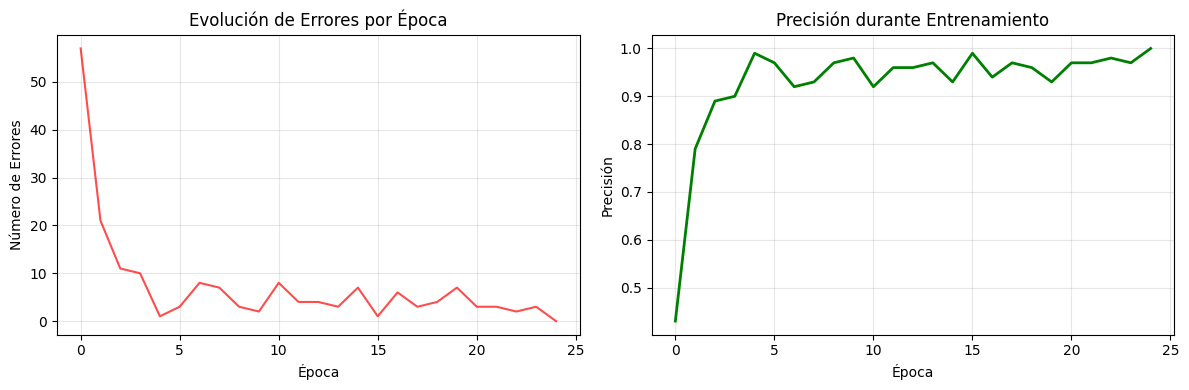


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 2.4401
ρ (margen mínimo): 0.0175
||w*||^2: 10.0000
Cota teórica: 193754.12
¿Se cumple? Sí


#################### Experimento con n=1000, p=20, seed=2024 ####################


INICIO DEL ENTRENAMIENTO
Muestras: 1000, Características: 20
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 1.4686 -1.8638  0.7125 -1.2203 -1.4623  0.8752  0.0144 -0.0037 -0.6096
 -1.4441  0.9462  1.7962 -0.6556 -0.9714 -0.2103  0.0033 -0.5736 -0.4554
 -0.5621  1.1679]
Bias inicial: -0.6893
--------------------------------------------------
Época   0: Errores = 136, Precisión = 86.4%
Época  20: Errores =  32, Precisión = 96.8%
Época  40: Errores =  22, Precisión = 97.8%
Época  60: Errores =  19, Precisión = 98.1%
Época  80: Errores =  15, Precisión = 98.5%
Época 100: Errores =  17, Precisión = 98.3%
Época 120: Errores =  16, Precisión = 98.4%
Época 140: Errores =  12, Precisión = 98.8%
Época 160: Errores =   9, Precisión = 99.1%
Época 180: Errores =  19, Precisión 

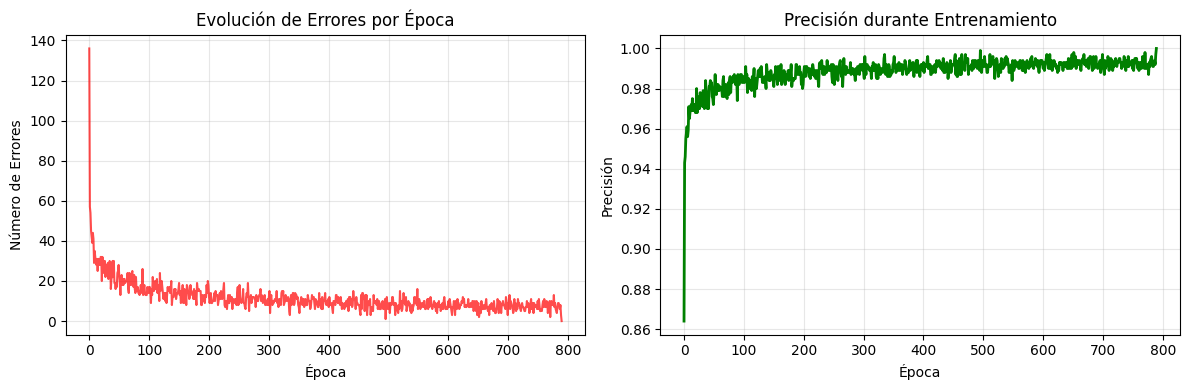


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 3.4019
ρ (margen mínimo): 0.0002
||w*||^2: 20.0000
Cota teórica: 10009634383.14
¿Se cumple? Sí


In [3]:
random_seeds = [1, 42, 100, 100, 2024]

for seed in random_seeds:
    np.random.seed(seed)

    for ni, pi in zip(n, p):
        print(f"\n\n{'#'*20} Experimento con n={ni}, p={pi}, seed={seed} {'#'*20}\n")
        x, y, w = Perceptron.linear_sep_data(ni, pi)

        perceptron = Perceptron(input_size = pi, learning_rate = 0.05)
        steps = perceptron.train(x, y, epochs = epochs, resultados = True)

        perceptron.plot_training_history()
        perceptron.evaluar_cota(x, y, w, steps)


## Dataset Bank Note Authentication.


INICIO DEL ENTRENAMIENTO
Muestras: 1372, Características: 4
Tasa de aprendizaje: 0.05
Pesos iniciales: [ 1.1126 -0.7389  0.4219 -0.1679]
Bias inicial: -0.4072
--------------------------------------------------
Época   0: Errores = 783, Precisión = 42.9%
Época  20: Errores = 766, Precisión = 44.2%
Época  40: Errores = 770, Precisión = 43.9%
Época  60: Errores = 775, Precisión = 43.5%
Época  80: Errores = 770, Precisión = 43.9%
Época 100: Errores = 773, Precisión = 43.7%
Época 120: Errores = 765, Precisión = 44.2%
Época 140: Errores = 776, Precisión = 43.4%
Época 160: Errores = 776, Precisión = 43.4%
Época 180: Errores = 773, Precisión = 43.7%
Época 200: Errores = 777, Precisión = 43.4%
Época 220: Errores = 770, Precisión = 43.9%
Época 240: Errores = 780, Precisión = 43.1%
Época 260: Errores = 773, Precisión = 43.7%
Época 280: Errores = 773, Precisión = 43.7%
Época 300: Errores = 765, Precisión = 44.2%
Época 320: Errores = 778, Precisión = 43.3%
Época 340: Errores = 778, Precisión = 43.

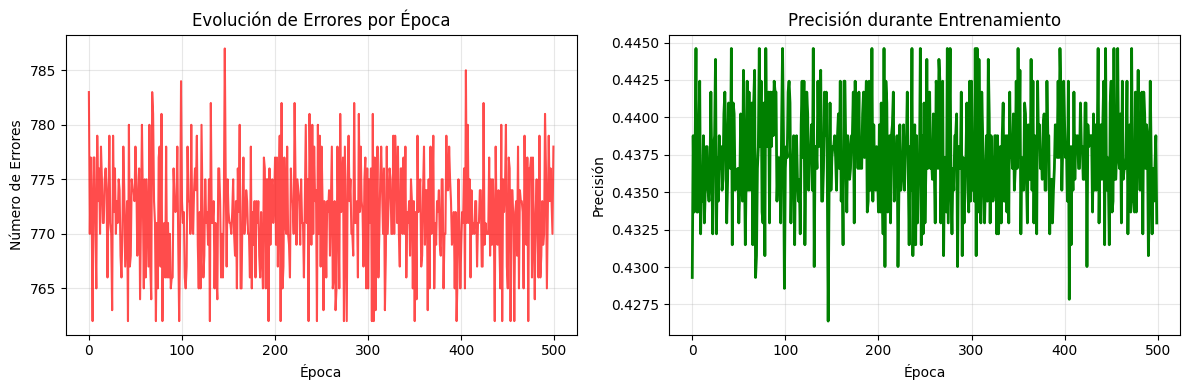


EVALUACIÓN DE LA COTA TEÓRICA
R (máx norma de x): 22.9486
ρ (margen mínimo): 0.0000
||w*||^2: 4.0000
Cota teórica: inf
¿Se cumple? Sí


C:\Users\Ezequiel\AppData\Local\Temp\ipykernel_16520\2550134753.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  bound = (R ** 2) / (rho ** 2) * nsq_w


In [5]:
import pandas as pd

data = '../data/raw/perceptron/banknote_auth.csv'
df_bank = pd.read_csv(data)

x = df_bank.iloc[:, :-1].to_numpy()
y = df_bank.iloc[:, -1].to_numpy()

n, p = x.shape
w = np.ones((p, 1))

perceptron = Perceptron(input_size = p, learning_rate = 0.05)
print(f"Seed: {seed}, convergence epoch: {perceptron.train(x, y, epochs = 500,  resultados = True)}")
perceptron.plot_training_history()
perceptron.evaluar_cota(x, y, w, steps)